## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Dataset

In [2]:
df = pd.read_csv(r'Data.csv')

In [3]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Prerocessing

In [4]:
df.shape

(683, 11)

In [5]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Exploratory Data Analysis

In [6]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
summary = df.describe()

In [8]:
class_distribution = df['Class'].value_counts()

In [9]:
summary, class_distribution

(       Sample code number  Clump Thickness  Uniformity of Cell Size  \
 count        6.830000e+02       683.000000               683.000000   
 mean         1.076720e+06         4.442167                 3.150805   
 std          6.206440e+05         2.820761                 3.065145   
 min          6.337500e+04         1.000000                 1.000000   
 25%          8.776170e+05         2.000000                 1.000000   
 50%          1.171795e+06         4.000000                 1.000000   
 75%          1.238705e+06         6.000000                 5.000000   
 max          1.345435e+07        10.000000                10.000000   
 
        Uniformity of Cell Shape  Marginal Adhesion  \
 count                683.000000         683.000000   
 mean                   3.215227           2.830161   
 std                    2.988581           2.864562   
 min                    1.000000           1.000000   
 25%                    1.000000           1.000000   
 50%                

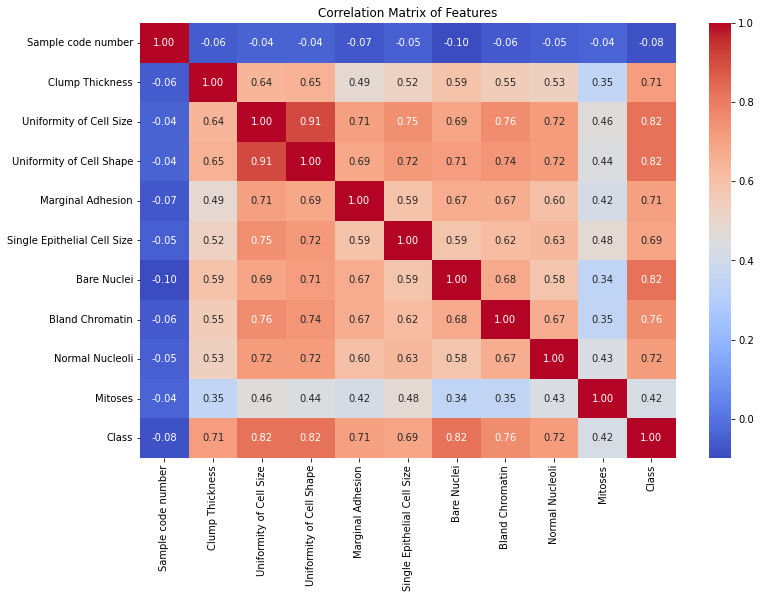

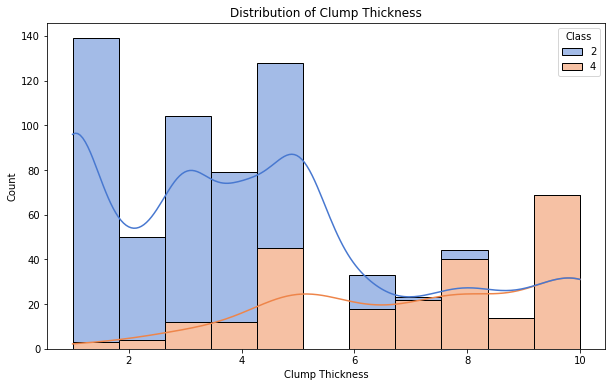

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df, x="Clump Thickness", hue="Class", multiple="stack", palette="muted", kde=True)
plt.title("Distribution of Clump Thickness")
plt.xlabel("Clump Thickness")
plt.ylabel("Count")
plt.show()

## Splitting Dataset

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  3  61]]


0.9590643274853801

## Test Prediction and Save Model

In [16]:
print(classifier.predict(sc.transform([[10132567,10,10,10,10,10,10,10,10,10]])))

[4]


In [17]:
import joblib

joblib.dump(classifier, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [18]:
model = joblib.dump(classifier, 'decision_tree_model.pkl')